# Анализ оттока клиентов Банка

**Описание проекта**  
Для нашего банка привлекать новых клиентов дорого, дешевле удержать тех, про которых мы уже что-то знаем. В отделе маркетинга нету автоматизированных систем рассылок, письма каждому клиенту пишутся вручную, поэтому нам важно для отдела маркетинга представить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

**Наша задача** — провести анализ оттока клиентов и подготовить план действий по их удержанию:
- сформировать типичные портреты клиентов: выделить несколько однородных сегментов и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые сегменты клиентов;
        2) предложить меры по снижению оттока.

**Результаты исследования** позволят разработать стратегию по возвращению или удержанию клиентов.

**Цель исследования** оптимизировать затраты банка на маркетинг.

**Описание данных**     
Данные получим из файла `bank.csv`:

    'userid' — идентификатор пользователя,
    'score' — баллы кредитного скоринга,
    'city' — город,
    'gender' — пол,
    'age' — возраст,
    'equity' — приблизительная оценка собственности клиента,
    'balance' — баланс на счёте,
    'products' — количество продуктов, которыми пользуется клиент,
    'credit_card' — есть ли кредитная карта,
    'last_activity' — был ли клиент активен последнее время,
    'salary' — заработная плата клиента
    'churn' — уходит или нет.

**Ход исследования**  
Исследование пройдёт в четыре этапа:
1. Изучение и обработка данных:
- заполнение пропусков
- обработка дубликатов, аномальных значений
- кодирование данных
2. Исследовательский анализ данных:
- Изучение медианы, моды, средних значений и стандартных отклонений
- Изучение медианы, моды, средних значений признаков в двух группах — тех, кто уходит в отток и тех, кто остается
- Построение столбчатых гистограмм и распределения признаков для тех, кто уходит (отток) и тех, кто остается (не попали в отток)
- Построение матрицы корреляций
3. Проверка гипотез:
- Гипотеза 1: Средние доходы между теми клиентами, которые ушли и теми, которые остались, различаются;
- Гипотеза 2: Средний возраст между теми клиентами, которые ушли и теми, которые остались, различаются
4. Сегментация клиентов:
- Распределение клиентов по сегментам;
- Изучение медианы, моды, средних значений и стандартных отклонений для сегментов
- Построение столбчатых гистограмм и распределения признаков для сегментов.

## Изучение и обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
from scipy.stats import mode
register_matplotlib_converters()
import seaborn as sns
sns.set_theme(
    style='whitegrid',
    rc = {'figure.figsize':(15,15)}
)

In [2]:
# чтение файла с данными и сохранение его в переменную
try:
    df = pd.read_csv('bank.csv')
except FileNotFoundError:
    path = "https://drive.google.com/"
    df = pd.read_csv(path)

In [3]:
def get_info(i):
    print('------ Первые 5 строк ------')
    display(i.head())
    print()
    print('------ Типы данных ------')
    i.info()
    print()
    print('------ Уникальные значения в файле ------')
    display(i.nunique())
    print()
    print('------ Пропуски в файле ------')
    display(i.isna().sum())
    print()
    print('------ Дубликаты в файле ------')
    display(i.duplicated().sum())

In [4]:
get_info(df)

------ Первые 5 строк ------


,Unnamed: 0,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,0,258835,673,Ростов,Ж,32,0,467428.54,1,0,1,81011.65,True
1,1,96660,691,Ростов,Ж,31,3,65548.60,1,0,1,57005.02,True
2,2,99838,679,Ростов,Ж,30,1,686979.40,1,1,1,149687.98,True
3,3,216099,717,Рыбинск,Ж,25,2,1292171.92,1,0,1,19502.68,True
4,4,120240,744,Рыбинск,Ж,37,1,1390927.97,1,0,1,36861.24,True



------ Типы данных ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   userid         10000 non-null  int64  
 2   score          10000 non-null  int64  
 3   city           10000 non-null  object 
 4   gender         10000 non-null  object 
 5   age            10000 non-null  int64  
 6   equity         10000 non-null  int64  
 7   balance        7706 non-null   float64
 8   products       10000 non-null  int64  
 9   credit_card    10000 non-null  int64  
 10  last_activity  10000 non-null  int64  
 11  salary         10000 non-null  float64
 12  churn          10000 non-null  bool   
dtypes: bool(1), float64(2), int64(8), object(2)
memory usage: 947.4+ KB

------ Уникальные значения в файле ------


Unnamed: 0       10000
userid           10000
score              551
city                 3
gender               2
age                 68
equity              10
balance           7706
products             5
credit_card          2
last_activity        2
salary            9999
churn                2
dtype: int64


------ Пропуски в файле ------


Unnamed: 0          0
userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64


------ Дубликаты в файле ------


0

**Вывод:**
- Дубликаты отсутствуют;
- Имеется столбец `Unnamed: 0` в котором продублированы индексы. Для дальнейшего анализа значения данного столбца не информативны, необходимо будет его удалить;
- В столбце `balance`, который показывает баланс на счёте пользователя, имеются 2294 пропусков. Возможно не выгрузились нулевые счета. Необходимо посмотреть на данные поглубже и решить какими значениями их заполнить;
- В столбце `churn` тип данных `bool`. Поменяем его на числовой с помощью преобразования в тип данных `int`;
- В столбце `gender` два категориальных признака `Ж` и `М`. Поменяем значения на числовые `1` и `0` с помощью замены данных;
- В столбце `city` три категориальных неупорядоченных признака `Ростов`, `Рыбинск` и `Ярославль`. Для построения матрицы корреляций преобразуем их в множество бинарных полей применив one-hot encoding.

In [5]:
# удалим столбец 'Unnamed: 0'
df = df.drop(['Unnamed: 0', 'userid'], axis=1)

In [6]:
# посмотрим на статистические данные столбца 'balance'
df['balance'].describe(include = 'all').apply("{0:.2f}".format)

count         7706.00
mean        779636.24
std        2102702.68
min            219.76
25%         188692.91
50%         426576.51
75%         965517.54
max      126385904.82
Name: balance, dtype: object

Минимальное значение баланса пользователя составляет 219.76 у.е. Тогда вероятнее всего пропуски появились из-за нулевого баланса на счете.

In [7]:
df[df.isnull().any(1)].head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
1439,358,Рыбинск,М,32,0,NaN,1,1,0,68687.05,False
1442,431,Рыбинск,М,31,0,NaN,1,1,1,123472.49,False
1443,350,Ярославль,Ж,29,0,NaN,1,1,0,109259.26,False
1453,496,Ярославль,Ж,33,0,NaN,1,1,0,101401.75,False
1454,506,Ярославль,Ж,33,0,NaN,1,1,0,120079.69,False


In [8]:
# посмотрим на статистические данные строк с пустыми значениями в столбце 'balance'
df[df.isnull().any(1)].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,2294.0,448.88,88.46,300.00,376.00,440.00,511.00,758.0
age,2294.0,41.83,11.71,18.00,33.00,39.00,49.00,86.0
equity,2294.0,0.05,0.22,0.00,0.00,0.00,0.00,1.0
balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,2294.0,1.01,0.08,1.00,1.00,1.00,1.00,2.0
credit_card,2294.0,1.00,0.06,0.00,1.00,1.00,1.00,1.0
last_activity,2294.0,0.54,0.50,0.00,0.00,1.00,1.00,1.0
salary,2294.0,172604.14,195016.43,8393.25,77218.66,114443.38,167847.75,1327784.3


In [9]:
# посмотрим на статистические данные строк с не пустыми значениями в столбце 'balance'
df.dropna().describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,7706.0,649.64,105.34,345.00,568.00,656.00,735.00,8.500000e+02
age,7706.0,43.14,12.23,18.00,34.00,40.00,52.00,8.600000e+01
equity,7706.0,2.25,1.64,0.00,1.00,2.00,3.00,9.000000e+00
balance,7706.0,779636.24,2102702.68,219.76,188692.91,426576.51,965517.54,1.263859e+08
products,7706.0,1.15,0.46,0.00,1.00,1.00,1.00,4.000000e+00
credit_card,7706.0,0.80,0.40,0.00,1.00,1.00,1.00,1.000000e+00
last_activity,7706.0,0.49,0.50,0.00,0.00,0.00,1.00,1.000000e+00
salary,7706.0,72505.49,95873.16,380.84,26898.24,50472.08,88154.81,1.378131e+06


Средние показатели пользователей с балансом выше, чем у пользователей без баланса кроме признаков `credit_card` и `salary`.

In [10]:
# посмотрим на уникальные значения в строках с пустыми значениями в столбце 'balance'
df[df.isnull().any(1)].nunique()

score             367
city                3
gender              2
age                65
equity              2
balance             0
products            2
credit_card         2
last_activity       2
salary           2294
churn               1
dtype: int64

Никаких явных взаимосвязей пропусков с другими столбцами не выявлено, кроме того что все клиенты являются действующими. Заполним пропуски значением 0.

In [11]:
# заполним пропуски значением 0
df = df.fillna(0)

In [12]:
# напишем функцию, которая будет возвращать
# категорию `Nan` - для пользователем без баланса
# категорию `Not_nan` - для пользователем с балансом
def is_nan(balance): 
    if balance == 0:
        return 'Nan'
    return 'Not_Nan'

# применим функцию is_nan
df['is_nan'] = df['balance'].apply(is_nan)
df.head(5)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,is_nan
0,673,Ростов,Ж,32,0,467428.54,1,0,1,81011.65,True,Not_Nan
1,691,Ростов,Ж,31,3,65548.60,1,0,1,57005.02,True,Not_Nan
2,679,Ростов,Ж,30,1,686979.40,1,1,1,149687.98,True,Not_Nan
3,717,Рыбинск,Ж,25,2,1292171.92,1,0,1,19502.68,True,Not_Nan
4,744,Рыбинск,Ж,37,1,1390927.97,1,0,1,36861.24,True,Not_Nan


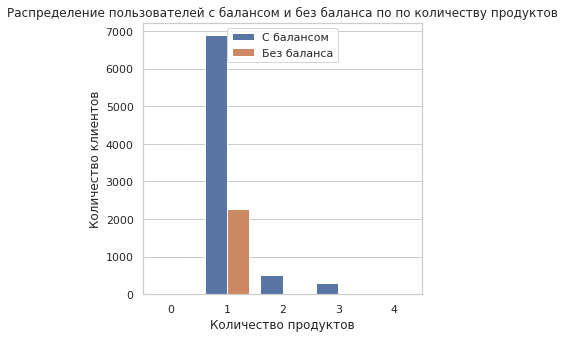

In [13]:
# построим гистограмму распределения пользователей с балансом и без баланса по по количеству продуктов
plt.figure(figsize=(5, 5))
sns.countplot(x = df['products'], hue='is_nan', data=df)
plt.title('Распределение пользователей с балансом и без баланса по по количеству продуктов')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.legend(['С балансом', 'Без баланса'])
plt.show()

Практически все пользователи без баланса пользуются только одним продуктом.

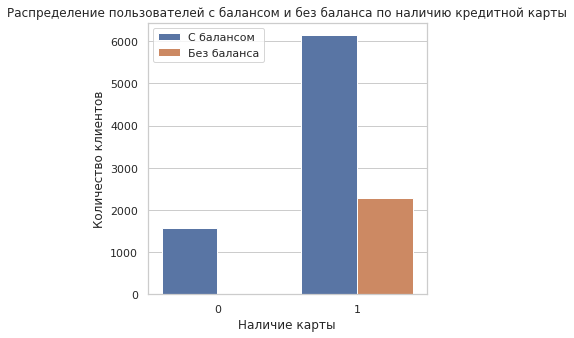

In [14]:
# построим гистограмму распределения пользователей с балансом и без баланса по наличию кредитной карты
plt.figure(figsize=(5, 5))
sns.countplot(x = df['credit_card'], hue='is_nan', data=df)
plt.title('Распределение пользователей с балансом и без баланса по наличию кредитной карты')
plt.ylabel('Количество клиентов')
plt.xlabel('Наличие карты')
plt.legend(['С балансом', 'Без баланса'])
plt.show()

Практически все пользователи без баланса пользуются кредитной картой.

Таким образом, можно предположить, что у всех пользователей без баланса оформлены кредитные карты, но при этом у них отсутствуют открытые дебетовые счета. Поэтому при выгрузке данных в столбце `balance` появились пропуски. В принципе отсутствие дебетового счета означает, что у клиентов отсутствуют денежные средства в банке, т.е. равны 0.

In [15]:
# удалим столбец 'is_nan', т.к. он далее не потребуется
df = df.drop(['is_nan'], axis=1)

In [16]:
# преобразуем тип данных столбца 'churn'
df['churn'] = df['churn'].astype(int)

In [17]:
# поменяем значения столбца 'gender' на числовые
df['gender'] = df['gender'].replace(to_replace=['Ж', 'М'], value=[1, 0])

In [18]:
# посмотрим на обработанную таблицу
df.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,673,Ростов,1,32,0,467428.54,1,0,1,81011.65,1
1,691,Ростов,1,31,3,65548.60,1,0,1,57005.02,1
2,679,Ростов,1,30,1,686979.40,1,1,1,149687.98,1
3,717,Рыбинск,1,25,2,1292171.92,1,0,1,19502.68,1
4,744,Рыбинск,1,37,1,1390927.97,1,0,1,36861.24,1


## Исследовательский анализ данных

### Изучение медианы, моды, средних значений и стандартных отклонений

In [19]:
# посмотрим на датасет
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,603.58,132.18,300.00,506.00,610.00,713.00,8.500000e+02
gender,10000.0,0.50,0.50,0.00,0.00,0.00,1.00,1.000000e+00
age,10000.0,42.84,12.13,18.00,34.00,40.00,51.00,8.600000e+01
equity,10000.0,1.75,1.71,0.00,0.00,1.00,3.00,9.000000e+00
balance,10000.0,600787.69,1874688.83,0.00,25047.04,268677.72,771976.43,1.263859e+08
products,10000.0,1.12,0.41,0.00,1.00,1.00,1.00,4.000000e+00
credit_card,10000.0,0.84,0.36,0.00,1.00,1.00,1.00,1.000000e+00
last_activity,10000.0,0.50,0.50,0.00,0.00,0.00,1.00,1.000000e+00
salary,10000.0,95468.12,132573.68,380.84,31449.29,63440.57,108795.85,1.378131e+06
churn,10000.0,0.14,0.35,0.00,0.00,0.00,0.00,1.000000e+00


In [20]:
df.mode().T

,0
score,602
city,Ярославль
gender,0
age,36
equity,0
balance,0.0
products,1
credit_card,1
last_activity,0
salary,128831.62


**Вывод:**
- кредитный рейтинг в диапазоне от 300 до 850, среднее значение - 603,58;
- распределение клиентов по полу одинаковое;
- возраст клиентов варьируется от 18 до 86 лет, среднее значение - 42,84, наиболее чаще всего встречаются клиенты возрастом 36 лет;
- приблизительная оценка собственности клиента от 0 до 9, в среднем - 1,75, однако наиболее чаще всего встречаются клиенты с нулевой оценком собственности;
- средний остаток на счете 600 787,69 у.е., стандартное отклонение - 1 874 688,83 у.е.(данные сильно разбросаны);
- количество продуктов используемых клиентами от 0 до 4, в среднем - 1,12, чаще всего - 1 продукт;
- кредитная карта имеется у большинства клиентов (84%);
- в последнее время активными были ровно половина клиентов;
- средняя заработная плата - 95 468,12 у.е., стандартное отклонение - 132 573,68 у.е.(данные сильно разбросаны);
- в отток попали 14% клиентов.

In [21]:
# посмотрим на датасет по городу Ростов
df.query('city == "Ростов"').describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,1431.0,607.76,124.55,300.00,516.00,612.00,706.00,849.00
gender,1431.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
age,1431.0,44.25,12.60,18.00,34.00,42.00,54.00,83.00
equity,1431.0,1.90,1.73,0.00,0.00,2.00,3.00,9.00
balance,1431.0,486102.94,668870.54,0.00,76922.74,280693.29,702153.86,11754095.07
products,1431.0,1.12,0.40,1.00,1.00,1.00,1.00,3.00
credit_card,1431.0,0.86,0.35,0.00,1.00,1.00,1.00,1.00
last_activity,1431.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
salary,1431.0,59305.84,54506.08,1371.22,23547.03,46519.33,77906.56,444082.66
churn,1431.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


**Вывод:**
Всего имеется 1431 клиентов из Ростова, в отличие от общего датасета:
- женщин чуть больше мужчин;
- максимальный возраст клиентов 83 лет, среднее значение - 44,25;
- средняя оценка собственности клиента - 1,90;
- средний остаток на счете меньше и составляет 486 102,94 у.е., стандартное отклонение - 668 870,54 у.е.(данные сильно разбросаны);
- максималльное количество продуктов используемых клиентами 3;
- кредитная карта имеется у 86% клиентов;
- в последнее время активными были 51% клиентов;
- средняя заработная плата меньше и составляет 59 305,84 у.е., стандартное отклонение - 54 506,08 у.е.(данные сильно разбросаны);
- в отток попали также 14% клиентов.

In [22]:
# посмотрим на датасет по городу Рыбинск
df.query('city == "Рыбинск"').describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,2663.0,611.31,134.68,300.00,511.00,620.00,724.00,850.00
gender,2663.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
age,2663.0,43.53,12.32,18.00,34.00,41.00,53.00,84.00
equity,2663.0,1.74,1.66,0.00,0.00,1.00,3.00,9.00
balance,2663.0,510411.80,745873.67,0.00,31156.40,262535.98,748930.86,9267779.18
products,2663.0,1.11,0.38,0.00,1.00,1.00,1.00,4.00
credit_card,2663.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
last_activity,2663.0,0.54,0.50,0.00,0.00,1.00,1.00,1.00
salary,2663.0,82909.07,97789.24,1707.44,29435.48,59252.19,100301.75,756309.98
churn,2663.0,0.11,0.32,0.00,0.00,0.00,0.00,1.00


**Вывод:**
Всего имеется 2663 клиентов из Рыбинска, в отличие от общего датасета:
- женщин чуть больше мужчин;
- максимальный возраст клиентов 84 лет, среднее значение - 43,53;
- средний остаток на счете меньше и составляет 510 411,80 у.е., стандартное отклонение - 745 873,67 у.е.(данные сильно разбросаны);
- кредитная карта имеется у 85% клиентов;
- в последнее время активными были 54% клиентов;
- средняя заработная плата меньше и составляет 82 909,07 у.е., стандартное отклонение - 97 789,24 у.е.(данные сильно разбросаны);
- в отток попали 11% клиентов.

In [23]:
# посмотрим на датасет по городу Ярославль
df.query('city == "Ярославль"').describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
score,5906.0,599.09,132.66,300.00,502.00,604.00,709.00,8.500000e+02
gender,5906.0,0.49,0.50,0.00,0.00,0.00,1.00,1.000000e+00
age,5906.0,42.18,11.88,18.00,33.00,39.00,50.00,8.600000e+01
equity,5906.0,1.71,1.73,0.00,0.00,1.00,3.00,9.000000e+00
balance,5906.0,669325.59,2362279.21,0.00,0.00,266760.68,802973.63,1.263859e+08
products,5906.0,1.12,0.43,1.00,1.00,1.00,1.00,4.000000e+00
credit_card,5906.0,0.84,0.37,0.00,1.00,1.00,1.00,1.000000e+00
last_activity,5906.0,0.48,0.50,0.00,0.00,0.00,1.00,1.000000e+00
salary,5906.0,109892.94,155353.56,380.84,35030.37,71732.61,120302.20,1.378131e+06
churn,5906.0,0.16,0.37,0.00,0.00,0.00,0.00,1.000000e+00


**Вывод:**
Всего имеется 5906 клиентов из Ярославля, в отличие от общего датасета:
- женщин чуть меньше мужчин;
- средний остаток на счете больше и составляет 669 325,59 у.е., стандартное отклонение - 2 362 279,21 у.е.(данные сильно разбросаны);
- в последнее время активными были 48% клиентов;
- средняя заработная плата больше и составляет 109 892,94 у.е., стандартное отклонение - 155 353,56 у.е.(данные сильно разбросаны);
- в отток попали 16% клиентов.

### Изучение медианы, моды, средних значений признаков в двух группах — тех, кто уходит в отток и тех, кто остается

In [24]:
df.groupby('churn').agg(['mean', 'median', mode]).round(2).T

churn                                  0                 1
score         mean                582.65            728.34
              median                 581               726
              mode         ([602], [38])     ([719], [16])
gender        mean                  0.52              0.39
              median                   1                 0
              mode         ([1], [4426])      ([0], [871])
age           mean                 43.45             39.18
              median                  41                37
              mode         ([36], [361])      ([34], [78])
equity        mean                  1.58              2.77
              median                   1                 3
              mode         ([0], [3168])      ([2], [315])
balance       mean             441942.93         1547334.4
              median           207137.25         995244.91
              mode       ([0.0], [2294])  ([1476.51], [1])
products      mean                  1.06              1.44
              median                   1                 1
              mode         ([1], [8039])     ([1], [1122])
credit_card   mean                  0.89              0.54
              median                   1                 1
              mode         ([1], [7649])      ([1], [774])
last_activity mean                  0.44              0.85
              median                   0                 1
              mode         ([0], [4787])     ([1], [1222])
salary        mean              91511.77         119043.77
              median            60043.72          82117.28
              mode    ([128831.62], [2])   ([3325.2], [1])

**Вывод:**   
У **оставшихся клиентов** в среднем:
- кредитный рейтинг составляет - 582,65;
- доля женщин 52%;
- возраст - 43,45 лет;
- медианная оценка собственности - 1;
- баланс на счете - 441 942,93 у.е.;
- используют 1 продукт;
- кредитная карта имеется у 89% клиентов;
- активными являются 44% клиентов;
- зарплата 91 511,77 у.е.

У **ушедших клиентов** в среднем:
- кредитный рейтинг составляет - 728,34;
- доля женщин 39%;
- возраст - 39,18 лет;
- медианная оценка собственности - 3;
- баланс на счете - 1 547 334,4 у.е.;
- используют 1 продукт;
- кредитная карта имеется у 54% клиентов;
- активными являются 85% клиентов;
- зарплата 119 043,77 у.е.

Получается у ушедших клиентов в отличие от оставшихся:
- кредитный рейтинг выше;
- доля женщин меньше;
- моложе;
- медианная оценка собственности выше;
- баланс на счете значительно больше;
- кредитных карт значительно меньше;
- почти в 2 раза активнее;
- заработная плата больше.

Таким образом, можно **предположить**, что в отток попадают наиболее активные и более молодые клиенты-мужчины с высоким кредитным рейтингом, доходом и остатком на счете, которые меньше оформляют кредитные карты.

In [25]:
pd.pivot_table(df, columns=['city'], index='churn', aggfunc=['mean', 'median']).round(2).T

churn                                   0           1
                     city                            
mean   age           Ростов         45.07       39.20
                     Рыбинск        44.02       39.69
                     Ярославль      42.78       39.01
       balance       Ростов     395977.99  1040822.03
                     Рыбинск    424461.18  1189967.93
                     Ярославль  461651.01  1769248.10
       credit_card   Ростов          0.90        0.58
                     Рыбинск         0.90        0.42
                     Ярославль       0.89        0.57
       equity        Ростов          1.78        2.66
                     Рыбинск         1.62        2.71
                     Ярославль       1.51        2.81
       gender        Ростов          0.55        0.36
                     Рыбинск         0.53        0.33
                     Ярославль       0.50        0.42
       last_activity Ростов          0.45        0.86
                     Рыбинск         0.49        0.96
                     Ярославль       0.42        0.81
       products      Ростов          1.08        1.38
                     Рыбинск         1.07        1.41
                     Ярославль       1.05        1.47
       salary        Ростов      56187.46    78499.47
                     Рыбинск     80946.21    98428.17
                     Ярославль  105292.22   134260.10
       score         Ростов        588.88      723.99
                     Рыбинск       595.38      737.24
                     Ярославль     575.05      726.42
median age           Ростов         42.00       37.00
                     Рыбинск        41.00       37.00
                     Ярославль      40.00       36.00
       balance       Ростов     247712.27   734430.62
                     Рыбинск    215682.96   944044.88
                     Ярославль  193075.55  1079309.56
       credit_card   Ростов          1.00        1.00
                     Рыбинск         1.00        0.00
                     Ярославль       1.00        1.00
       equity        Ростов          1.00        2.00
                     Рыбинск         1.00        3.00
                     Ярославль       1.00        3.00
       gender        Ростов          1.00        0.00
                     Рыбинск         1.00        0.00
                     Ярославль       1.00        0.00
       last_activity Ростов          0.00        1.00
                     Рыбинск         0.00        1.00
                     Ярославль       0.00        1.00
       products      Ростов          1.00        1.00
                     Рыбинск         1.00        1.00
                     Ярославль       1.00        1.00
       salary        Ростов      43658.96    61534.31
                     Рыбинск     56888.85    78447.29
                     Ярославль   68465.29    89495.00
       score         Ростов        591.00      718.00
                     Рыбинск       598.00      735.00
                     Ярославль     572.00      724.50

In [26]:
pd.pivot_table(df, columns=['city'], index='churn', aggfunc=lambda x: x.mode().iat[0]).round(2).T

churn                          0         1
              city                        
age           Ростов       36.00     32.00
              Рыбинск      36.00     34.00
              Ярославль    33.00     35.00
balance       Ростов        0.00  12462.88
              Рыбинск       0.00   9350.42
              Ярославль     0.00   1476.51
credit_card   Ростов        1.00      1.00
              Рыбинск       1.00      0.00
              Ярославль     1.00      1.00
equity        Ростов        0.00      2.00
              Рыбинск       0.00      3.00
              Ярославль     0.00      2.00
gender        Ростов        1.00      0.00
              Рыбинск       1.00      0.00
              Ярославль     1.00      0.00
last_activity Ростов        0.00      1.00
              Рыбинск       0.00      1.00
              Ярославль     0.00      1.00
products      Ростов        1.00      1.00
              Рыбинск       1.00      1.00
              Ярославль     1.00      1.00
salary        Ростов     1371.22   7522.14
              Рыбинск    1707.44   3325.20
              Ярославль   380.84   5043.14
score         Ростов      599.00    769.00
              Рыбинск     620.00    719.00
              Ярославль   543.00    675.00

**Вывод:**  
Данные в разбивке по городам так же подтверждают предположение, полученное по итогам анализа по всему датасету.

### Построение столбчатых гистограмм и распределения признаков для тех, кто уходит (отток) и тех, кто остается (не попали в отток)

In [27]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
binary_features = ['gender', 'credit_card', 'last_activity', 'churn']

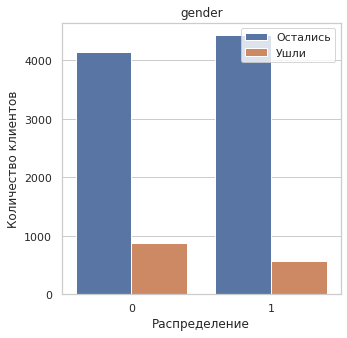

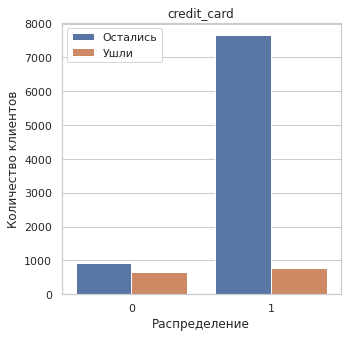

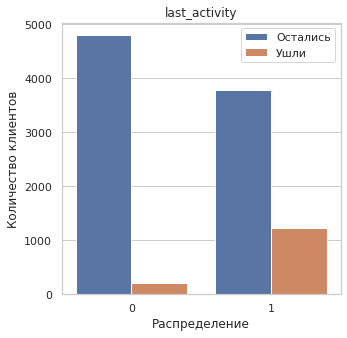

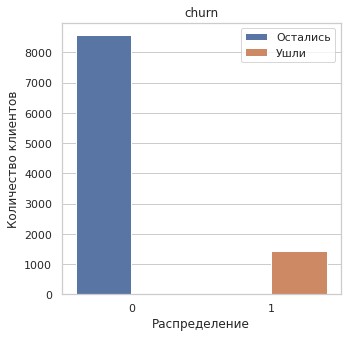

In [28]:
for column in binary_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.ylabel('Количество клиентов')
    plt.xlabel('Распределение')
    plt.legend(['Остались', 'Ушли'])
    plt.show()

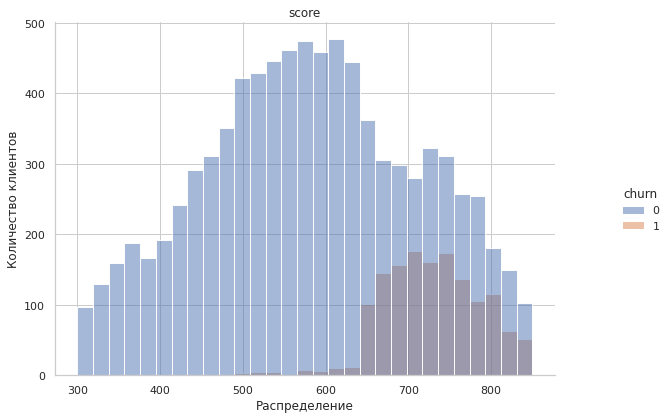

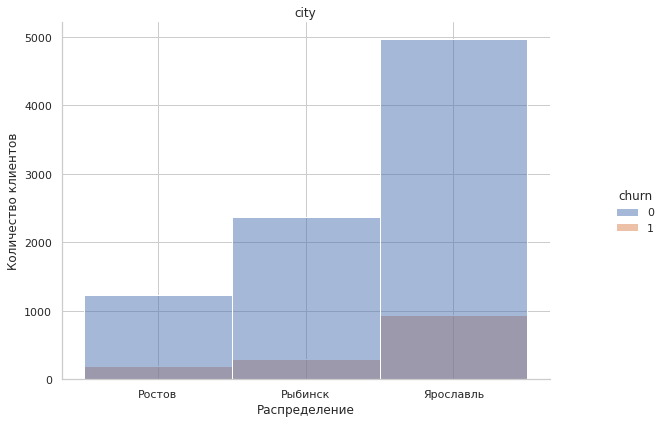

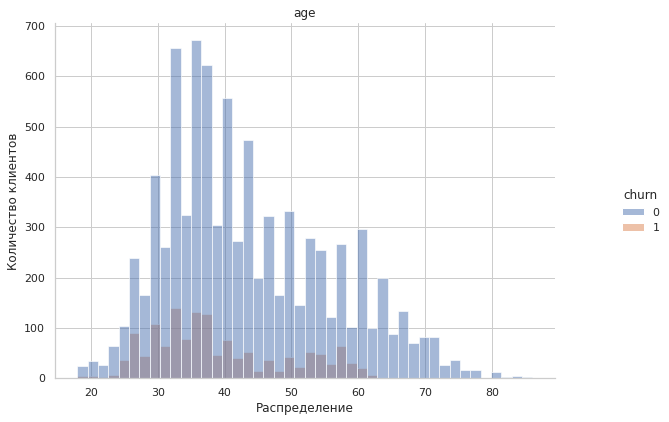

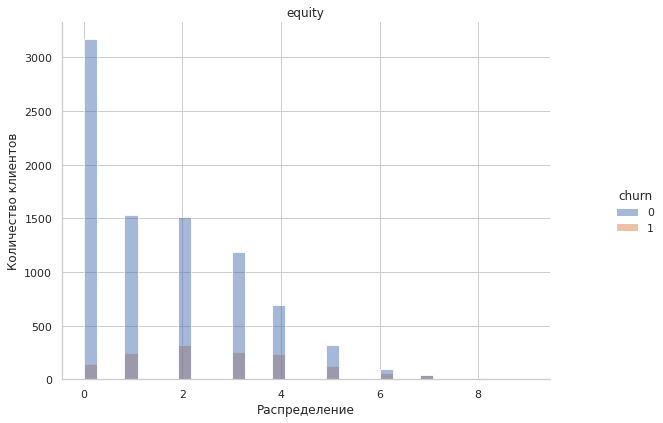

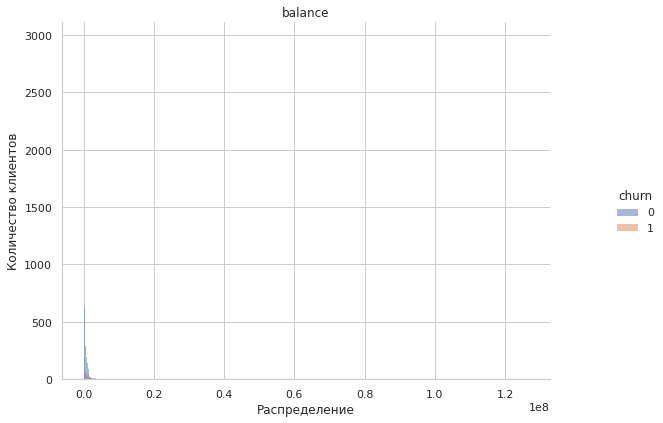

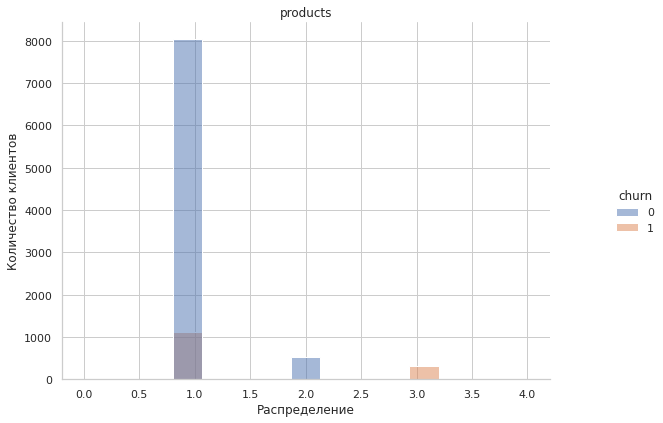

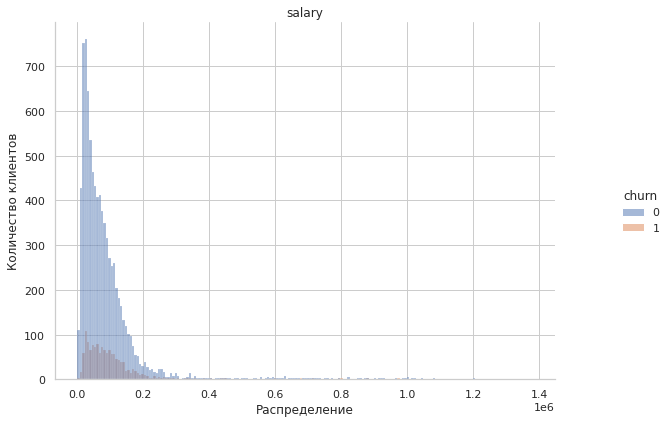

In [29]:
for column in df.columns:
    if column not in binary_features:
        ax= sns.displot(df, x=df[column], hue='churn', kind='hist')
        ax.fig.set_figwidth(10)
        ax.fig.set_figheight(6)
        plt.title(column)
        plt.ylabel('Количество клиентов')
        plt.xlabel('Распределение')
        plt.show()

<Figure size 576x360 with 0 Axes>

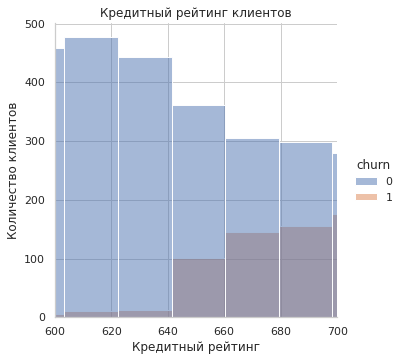

In [30]:
# посмотрим на таблицу 'score' поближе в диапазоне от 600 до 700, в котором происходит резкий рост оттока клиентов 
plt.figure(figsize=(8, 5))
(sns.displot(df, x=df['score'], hue='churn', kind='hist')
    .set(xlim=(600,700)))
plt.title('Кредитный рейтинг клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Кредитный рейтинг')
plt.show()

<Figure size 576x360 with 0 Axes>

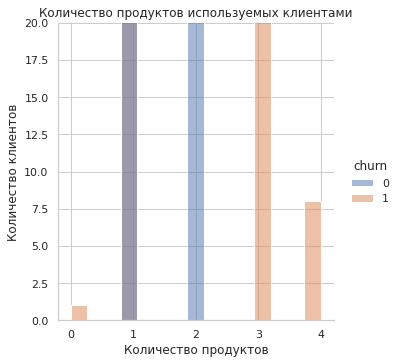

In [31]:
# посмотрим на таблицу 'products' поближе в диапазоне от 600 до 700, в котором происходит резкий рост оттока клиентов 
plt.figure(figsize=(8, 5))
(sns.displot(df, x=df['products'], hue='churn', kind='hist')
    .set(ylim=(0, 20)))
plt.title('Количество продуктов используемых клиентами')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.show()
plt.show()

Т.к. полученные столбчатые гистограммы для столбцов `balance` и `salary` получились неинформативными из-за выбросов, построим дополнительно графики с боксплотами.

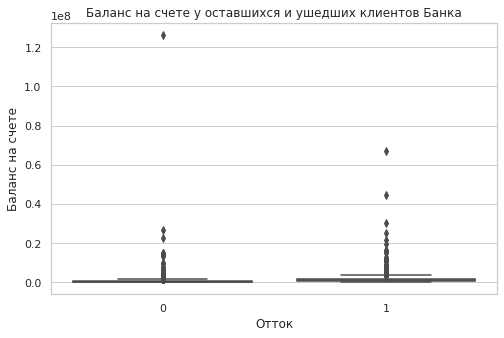

In [32]:
plt.figure(figsize=(8, 5))
(sns.boxplot(x = 'churn', y = df['balance'], data = df)
    .set(title = 'Баланс на счете у оставшихся и ушедших клиентов Банка', xlabel = 'Отток',
         ylabel = 'Баланс на счете'))
plt.show()

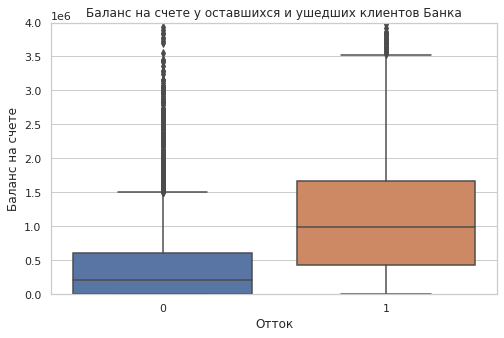

In [33]:
#взглянем на таблицу поближе
plt.figure(figsize=(8, 5))
(sns.boxplot(x = 'churn', y = df['balance'], data = df)
    .set(title = 'Баланс на счете у оставшихся и ушедших клиентов Банка', xlabel = 'Отток',
         ylabel = 'Баланс на счете', ylim=(0, 4000000)))
plt.show()

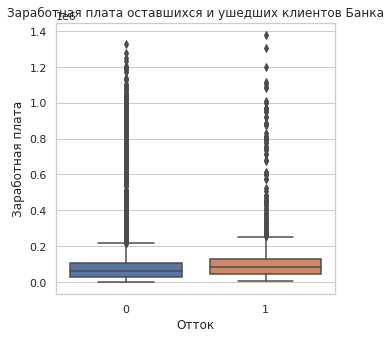

In [34]:
plt.figure(figsize=(5, 5))
(sns.boxplot(x = 'churn', y = df['salary'], data = df)
    .set(title = 'Заработная плата оставшихся и ушедших клиентов Банка', xlabel = 'Отток',
         ylabel = 'Заработная плата'))
plt.show()

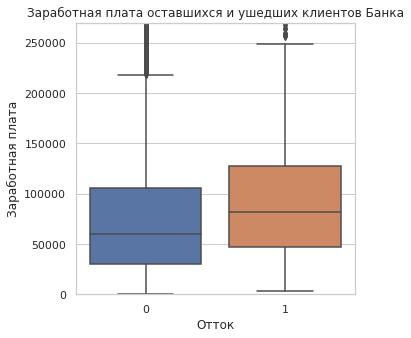

In [35]:
#взглянем на таблицу поближе
plt.figure(figsize=(5, 5))
(sns.boxplot(x = 'churn', y = df['salary'], data = df)
    .set(title = 'Заработная плата оставшихся и ушедших клиентов Банка', xlabel = 'Отток',
         ylabel = 'Заработная плата', ylim=(0, 270000)))
plt.show()

**Вывод:**   
- с увеличением кредитного рейтинга доля оттока увеличивается, резкий скачок наблюдается с 640;
- в отток в основном попадают клиенты возрастом от 24 до 62 лет;
- с увеличением оценки собственности доля оттока увеличивается;
- все клиенты, которые пользуются 2-мя продуктами банка, не попадают в отток
- все клиенты, которые не используют ни одного продукта либо пользуются 3-мя и более продуктами банка, - попадают в отток
- баланс на счете и заработная плата ушедших клиентов значительно больше оставшихся.

### Построение матрицы корреляций

In [36]:
# применить one-hot кодирование при помощи pandas.get_dummies
df = pd.get_dummies(df)

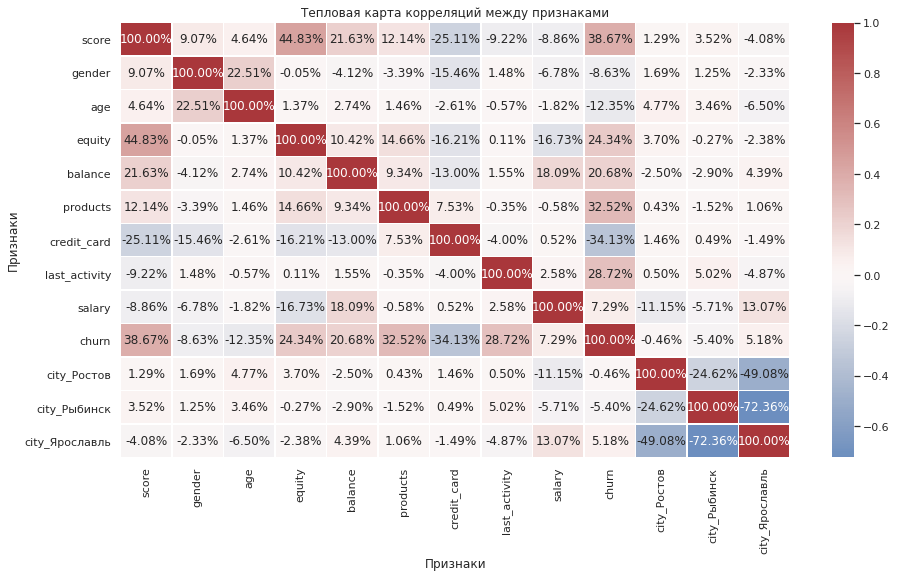

In [37]:
# построим матрицу корреляций и отобразим её
plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(),center=0.00, annot=True, linewidths=.5, fmt ='.2%', cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Тепловая карта корреляций между признаками')
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

**Вывод:**  
Наиболее высокая зависимость факта оттока прослеживается от кредитного рейтинга, наличия кредитной карты и количества используемых продуктов.

## Проверка гипотез

### Гипотеза 1: Средние доходы между теми клиентами, которые ушли и теми, которые остались, различаются

Н0 (нулевая гипотеза) - Средние доходы между теми клиентами, которые ушли и теми, которые остались, **равны**, т.е. средние значения равны.

Н1 (альтернативная гипотеза) - Средние доходы между теми клиентами, которые ушли и теми, которые остались, **не равны**, т.е. средние значения не равны.

In [38]:
df_churn = df[df['churn'] == 1]
df_no_churn = df[df['churn'] == 0]

print('Количество ушедших клиентов', len(df_churn))
print('Количество оставшихся клиентов', len(df_no_churn))

Количество ушедших клиентов 1437
Количество оставшихся клиентов 8563


In [39]:
print('Дисперсия ушедших клиентов', round(np.var(df_churn['salary'], ddof=1), 2))
print('Дисперсия оставшихся клиентов', round(np.var(df_no_churn['salary'], ddof=1), 2))

Дисперсия ушедших клиентов 23777799357.12
Дисперсия оставшихся клиентов 16428706717.17


Дисперсии выборок отличаются более чем на 5%.  

Для проверки гипотез можно использовать u-критерий Манна-Уитни или t-критерий Стьюдента. 

Имеется три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:
- Генеральные совокупности не должны зависеть друг от друга. - **соответствует условию**
- Выборочные средние должны быть нормально распределены. Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально. - **генеральная совокупность не распределена нормально, однако размер выборки достаточно большой**
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. - **дисперсии и размеры выборок не равны, поэтому необходимо при проведении t-теста указать параметр equal_var=False**

u-критерий Манна-Уитни является непараметрическим тестом, главное отличие которого в в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

В рассматриваемом случае нам необходимо рассмотреть именно значения признаков, поэтому для проверки гпиотез используем функцию ttest_ind указав параметр equal_var=False.

In [40]:
results = st.ttest_ind(df_churn['salary'], df_no_churn['salary'], equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  1.8932088274287858e-10
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между доходами у ушедших и оставшихся клиентов банка, т.е. маловероятна случайность результатов теста гипотезы.

In [41]:
print('Средняя выручка ушедших клиентов - {:,.2f} у.е.'.format(df_churn['salary'].mean()))
print('Средняя выручка оставшихся клиентов - {:,.2f} у.е.'.format(df_no_churn['salary'].mean()))

Средняя выручка ушедших клиентов - 119,043.77 у.е.
Средняя выручка оставшихся клиентов - 91,511.77 у.е.


Средняя выручка ушедших клиентов значительно больше показателя оставшихся.

### Гипотеза 2: Средний возраст между теми клиентами, которые ушли и теми, которые остались, различаются

Н0 (нулевая гипотеза) - Средний возраст между теми клиентами, которые ушли и теми, которые остались, **равны**, т.е. средние значения равны.

Н1 (альтернативная гипотеза) - Средний возраст между теми клиентами, которые ушли и теми, которые остались, **не равны**, т.е. средние значения не равны.

In [42]:
print('Дисперсия ушедших клиентов', round(np.var(df_churn['age'], ddof=1), 2))
print('Дисперсия оставшихся клиентов', round(np.var(df_no_churn['age'], ddof=1), 2))

Дисперсия ушедших клиентов 104.52
Дисперсия оставшихся клиентов 151.64


Дисперсии выборок отличаются более чем на 5%.  

Для проверки гипотез можно использовать u-критерий Манна-Уитни или t-критерий Стьюдента. 

Имеется три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:
- Генеральные совокупности не должны зависеть друг от друга. - **соответствует условию**
- Выборочные средние должны быть нормально распределены. Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально. - **генеральная совокупность не распределена нормально, однако размер выборки достаточно большой**
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. - **дисперсии и размеры выборок не равны, поэтому необходимо при проведении t-теста указать параметр equal_var=False**

u-критерий Манна-Уитни является непараметрическим тестом, главное отличие которого в в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

В рассматриваемом случае нам необходимо рассмотреть именно значения признаков, к тому же в столбце `age` имеются много повторяющихся значений, поэтому для проверки гпиотез используем функцию ttest_ind указав параметр equal_var=False.

In [43]:
results = st.ttest_ind(df_churn['age'], df_no_churn['age'], equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  7.184859963384656e-44
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между возрастом ушедших и оставшихся клиентов банка, т.е. маловероятна случайность результатов теста гипотезы.

In [44]:
print('Средний возраст ушедших клиентов - {:,.2f} лет.'.format(df_churn['age'].mean()))
print('Средняя возраст оставшихся клиентов - {:,.2f} лет.'.format(df_no_churn['age'].mean()))

Средний возраст ушедших клиентов - 39.18 лет.
Средняя возраст оставшихся клиентов - 43.45 лет.


Ушедшие клиенты в среднем на 4 года моложе оставшихся.

## Сегментация клиентов

### Распределение клиентов по сегментам

По итогам исследовательского анализа данных и матрицы коррелляций получены данные о том, что:
- наиболее высокая зависимость факта оттока прослеживается от кредитного рейтинга, наличия кредитной карты и количества используемых продуктов;
- в отток в основном попадают клиенты с кредитным рейтингом выше 640 баллов.
- все клиенты, которые пользуются 2-мя продуктами банка, не попадают в отток
- все клиенты, которые не используют ни одного продукта либо пользуются 3-мя и более продуктами банка, - попадают в отток

Для планирования маркетинговой стратегии по удержанию клиентов выделим 6 основных сегмента с кредитным рейтингом более 640:
- сегмент 1 - клиенты которые не используют ни одного продукта;
- сегмент 2 - клиенты пользуются 1 продуктом банка с кредитной картой;
- сегмент 3 - клиенты пользуются 1 продуктом банка и без кредитной картой;
- сегмент 4 - клиенты пользуются 2 продуктами банка с кредитной картой;
- сегмент 5 - клиенты пользуются 2 продуктами банка и без кредитной картой;
- сегмент 6 - клиенты которые пользуются 3-мя и более продуктами банка;

In [45]:
# запишем функцию, которая будет возвращать сегменты
def segmentation(x): 
    if x[0] >= 640:
        if x[1] == 0:
            return '1'
        if x[1] == 1:
            if x[2] == 1:
                return '2'
            if x[2] == 0:
                return '3'
        if x[1] == 2:
            if x[2] == 1:
                return '4'
            if x[2] == 0:
                return '5'
        return '6'

In [46]:
# применим функцию segmentation
df['segment'] = df[['score', 'products', 'credit_card']].apply(segmentation, axis=1)
df.head(5)

,score,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,segment
0,673,1,32,0,467428.54,1,0,1,81011.65,1,1,0,0,3
1,691,1,31,3,65548.60,1,0,1,57005.02,1,1,0,0,3
2,679,1,30,1,686979.40,1,1,1,149687.98,1,1,0,0,2
3,717,1,25,2,1292171.92,1,0,1,19502.68,1,0,1,0,3
4,744,1,37,1,1390927.97,1,0,1,36861.24,1,0,1,0,3


### Изучение медианы, моды, средних значений признаков по сегментам

In [47]:
df['segment'].value_counts()

2    2816
3    1077
6     272
4      75
5      11
Name: segment, dtype: int64

Распределение количества клиентов по сегментам неравномерное.

In [48]:
df.groupby('segment').agg(['mean', 'median', mode]).round(2).T

segment                               2                           3  \
score          mean              726.66                       735.4   
               median               723                         734   
               mode       ([659], [27])               ([719], [15])   
gender         mean                0.52                        0.62   
               median                 1                           1   
               mode       ([1], [1451])                ([1], [664])   
age            mean                43.0                       43.13   
               median                40                          40   
               mode       ([37], [120])                ([31], [43])   
equity         mean                 2.3                        2.61   
               median                 2                           2   
               mode        ([2], [671])                ([2], [249])   
balance        mean           800476.34                  1404285.88   
               median          428707.7                   930794.51   
               mode       ([0.0], [44])            ([8463.16], [1])   
products       mean                 1.0                         1.0   
               median                 1                           1   
               mode       ([1], [2816])               ([1], [1077])   
credit_card    mean                 1.0                         0.0   
               median                 1                           0   
               mode       ([1], [2816])               ([0], [1077])   
last_activity  mean                0.41                        0.56   
               median                 0                           1   
               mode       ([0], [1666])                ([1], [603])   
salary         mean            76058.98                   107466.49   
               median          49636.73                    76530.67   
               mode    ([1982.95], [1])  ([4623.499999999999], [1])   
churn          mean                0.17                         0.6   
               median                 0                           1   
               mode       ([0], [2346])                ([1], [648])   
city_Ростов    mean                0.15                        0.13   
               median                 0                           0   
               mode       ([0], [2388])                ([0], [939])   
city_Рыбинск   mean                 0.3                        0.26   
               median                 0                           0   
               mode       ([0], [1974])                ([0], [798])   
city_Ярославль mean                0.55                        0.61   
               median                 1                           1   
               mode       ([1], [1546])                ([1], [660])   

segment                                         4                   5  \
score          mean                         729.6              727.73   
               median                         727                 726   
               mode                  ([746], [3])        ([650], [1])   
gender         mean                          0.69                 1.0   
               median                           1                   1   
               mode                   ([1], [52])         ([1], [11])   
age            mean                         58.23               70.09   
               median                          64                  69   
               mode                   ([63], [5])         ([69], [2])   
equity         mean                          2.67                2.09   
               median                           2                   2   
               mode                   ([2], [19])          ([1], [3])   
balance        mean                    1176561.76          1485720.88   
               median                   619256.04           1358179.0   
               mode             ([24076.95], [1])  ([639986.92],

**Отличительные признаки сегментов:**  
- **Сегмент 1**:
    - отсутствует;
- **Сегмент 2**:
    - все клиенты используют 1 продукт;
    - все клиенты имеют кредитную карту;
    - 41% клиентов являются активными;
    - баланс на счете ниже остальных сегментов - 800 476,34 у.е.
    - отток составляет 17%;
- **Сегмент 3**:
    - все клиенты используют 1 продукт;
    - все клиенты не имеют кредитную карту;
    - 56% клиентов являются активными;
    - высокий отток в размере 60%;
- **Сегмент 4**:
    - все клиенты используют 2 продукта;
    - все клиенты имеют кредитную карту;
    - средняя заработная плата ниже остальных сегментов - 44 058,05 у.е.;
    - низкий процент активных клиентов - 16%;
    - отток отсутствует;
- **Сегмент 5**:
    - все клиенты используют 2 продукта;
    - все клиенты не имеют кредитную карту;
    - все клиенты женщины;
    - средний возраст выше остальных сегментов - 70,09 лет
    - низкий процент активных клиентов - 18%;
    - отток отсутствует;
- **Сегмент 6**:
    - все клиенты используют 3 продукта;
    - баланс на счете выше остальных сегментов - 1 703 156,60 у.е.;
    - средняя заработная плата выше остальных сегментов - 123 824,23 у.е.;
    - высокий процент активных клиентов - 62%;
    - 100% отток.

### Построение столбчатых гистограмм и распределения признаков для сегментов

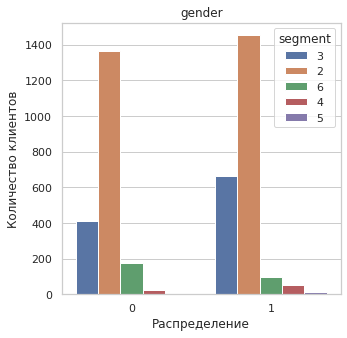

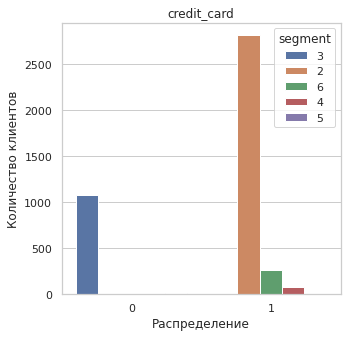

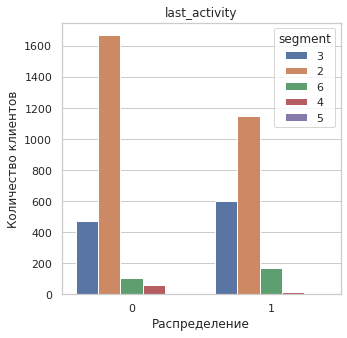

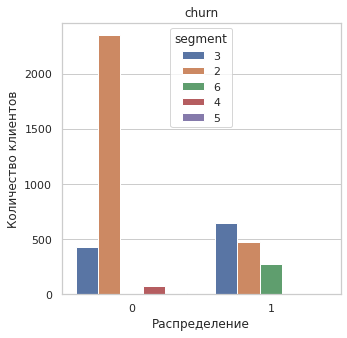

In [50]:
for column in binary_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='segment', data=df)
    plt.title(column)
    plt.ylabel('Количество клиентов')
    plt.xlabel('Распределение')
    plt.show()

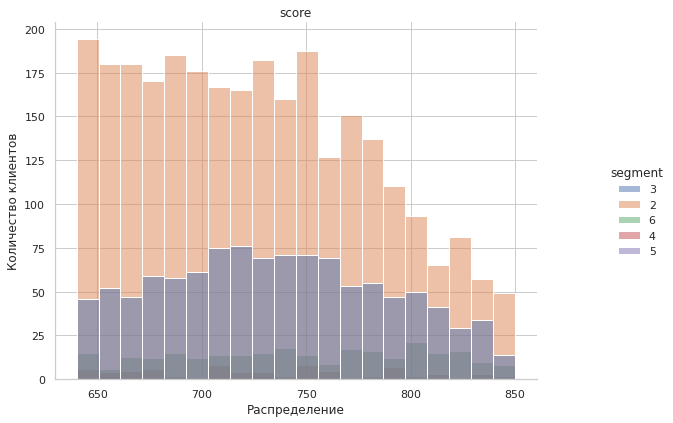

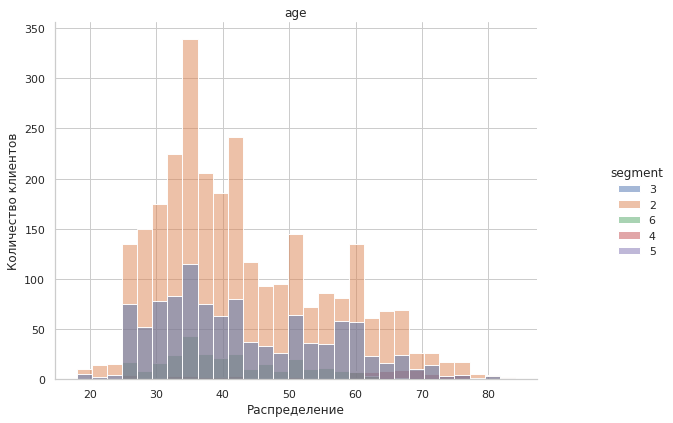

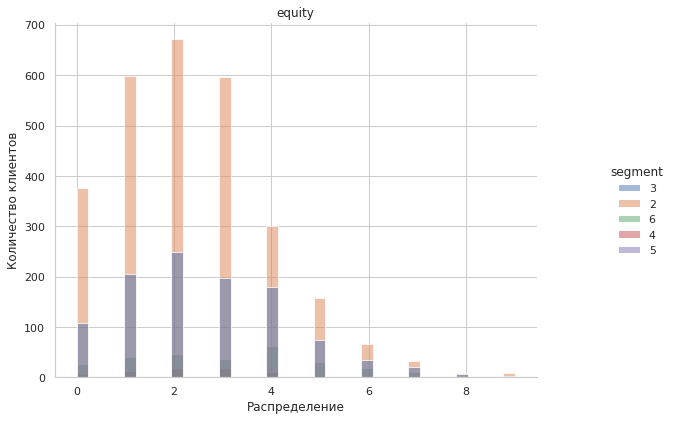

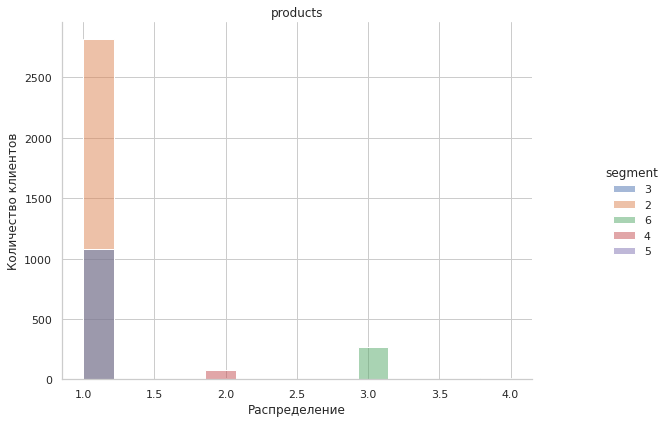

In [51]:
for column in df.columns:
    if column not in ['balance', 'salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'segment']:
        if column not in binary_features:
            ax= sns.displot(df, x=df[column], hue='segment', kind='hist')
            ax.fig.set_figwidth(10)
            ax.fig.set_figheight(6)
            plt.title(column)
            plt.ylabel('Количество клиентов')
            plt.xlabel('Распределение')
            plt.show()

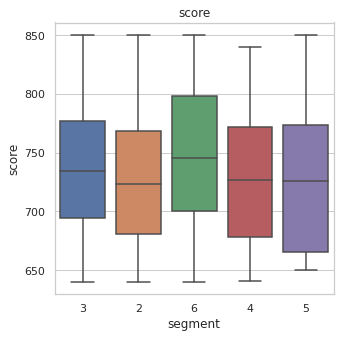

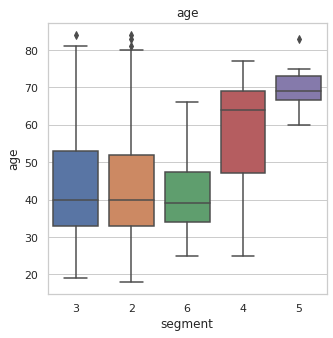

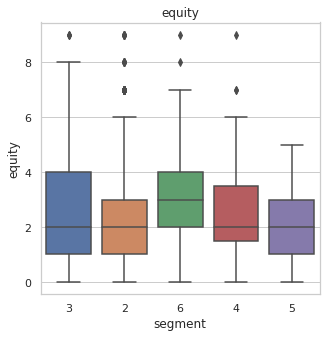

In [52]:
for column in df.columns:
    if column not in ['products', 'balance', 'salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'segment']:
        if column not in binary_features:  
            plt.figure(figsize=(5, 5))
            sns.boxplot(x = 'segment', y = df[column], data = df)
            plt.title(column)
            plt.show()

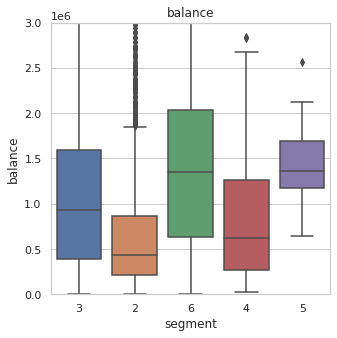

In [53]:
plt.figure(figsize=(5, 5))
(sns.boxplot(x = 'segment', y = df['balance'], data = df)
    .set(ylim=(0, 3000000)))
plt.title('balance')
plt.show()

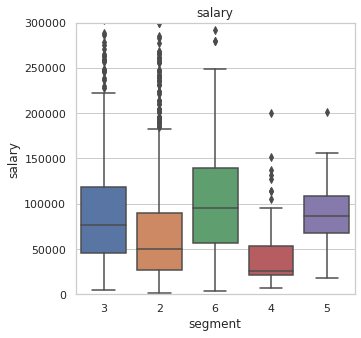

In [54]:
plt.figure(figsize=(5, 5))
(sns.boxplot(x = 'segment', y = df['salary'], data = df)
    .set(ylim=(0, 300000)))
plt.title('salary')
plt.show()

**Вывод:**  
- наиболее отличительные признаки наблюдаются по тем параметрам, по которым клиенты были сегментированы: количество используемых продуктов и наличие кредитной карты;
- наиболее возрастные клиенты 66+ находятся в сегменте 5, в сегменте 4 примерно от 47 до 69 лет, у остальных сегментов клиенты не старше 54 лет;
- приблизительная оценка собственности у всех сегментов от 1 до 4;
- баланс на счете и заработная плата отточного сегмента 6 выше, чем у остальных сегментов, также в данном сегменте более молодые клиенты.

Сегменты 4 и 5 без оттока, в сумме которых имеется только 86 клиентов, вероятнее всего в силу возраста более консервативны и не так часто рассматривают переход в другие банки.

Поэтому наиболее надежным сегментом можно считать сегмент 2 с 2816 клиентами с наименьшей долей отток в размер 16,69%.

Сегменте 6 со стопроцентным оттоком, в котором имеется всего 272 клиентов, вероятнее в силу высокого дохода и более молодого возраста более гибки, лучше разбираются в предложениях банков, и потому чаще всего рассматривают переход в другие банки .

Поэтмоу наиболее ненадежным сегментом можно считать сегмент 3 с наибольшей долей оттока клиентов в размере 60,17%.

Для разработки маркетинговой стратегии по удержанию клиентов лучше всего сфокусироваться на сегменте 3.

## Общий вывод и рекомендации

По итогам проведенного анализа сформирован портрет среднестатистического клиента банка:
- средний кредитный рейтинг - 603,58;
- средний возраст - 42,84 лет;
- чаще всего с нулевой оценком собственности;
- средний остаток на счете 600 787,69 у.е.;
- чаще всего пользуется 1 продуктом;
- у 84% клиентов банка имеется кредитная карта;
- средняя заработная плата - 95 468,12 у.е.

Выделены 5 сегментов клиентов:
- сегмент 1 - клиенты которые не используют ни одного продукта (клиенты отсутствуют);
- сегмент 2 - клиенты пользуются 1 продуктом банка с кредитной картой (доля оттока 16,69%);
- сегмент 3 - клиенты пользуются 1 продуктом банка и без кредитной картой (доля оттока 60,17%);
- сегмент 4 - клиенты пользуются 2 продуктами банка с кредитной картой (отток отсутствует);
- сегмент 5 - клиенты пользуются 2 продуктами банка и без кредитной картой (отток отсутствует);
- сегмент 6 - клиенты которые пользуются 3-мя и более продуктами банка (доля оттока 100%);

Анализ показал, что чаще всего в отток попадают клиенты, которые:
- имеют кредитный рейтинг выше 640 баллов;
- не используют ни одного продукта либо пользуются 3-мя и более продуктами банка;
- пользуются 1-м продуктов банка, но при этом не имеют кредитную карту.

Наиболее лояльны и надежны клиенты, которые:
- имеют кредитный рейтинг ниже 640 баллов;
- либо имеют кредитный рейтинг выше 640 баллов, но:
    - пользуются только 1-м продуктом банка и имеют кредитную карту;
    - пользуются 2-мя продуктами банка.

Таким образом, для удержания оттока клиентов необходимо сфокусироваться на сегменте 3, который представлен клиентами с рейтингом выше 640, пользующимися 1 продуктом банка и без кредитной карты. Для данной категории клиентов рекомендуется направлять предложения по оформлению кредитной карты, при этом не допускать увеличение количества используемых продуктов до 3-х, т.к. в таком случае они могут попасть в самый ненадежный сегмент 6 со 100% оттоком.

Дополнительно клиентам сегмента 6, которые пользуются 3-мя и более продуктами, можно предложить более конкурентные условия (снижение ставок по кредитам, увеличение ставок по вкладам, повышенный кэшбек и т.д.) по сравнению с другими банками.

## Презентация

Ссылка на презентацию: https://disk.yandex.ru/i/9tbasSRapgUOBQ

## Дашбоард

Ссылка на дашбоард: https://public.tableau.com/app/profile/zyana/viz/_16600497375210/Dashboard?publish=yes